<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_13_Customizing_TensorFlow_Models_and_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing and Setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [2]:
# Loading California Housing Dataset
housing = fetch_california_housing()

X = housing.data
y = housing.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (20640, 8)
Target shape: (20640,)


In [3]:
# Splitting Data (Train / Validation / Test)
# First splitting: Train + Validation and Test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second splitting: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (13209, 8)
Validation set: (3303, 8)
Test set: (4128, 8)


In [4]:
# Standardizing the Dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Implementing Custom MSE Loss Function
def my_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [6]:
# Training a Simple Model Using Custom Loss
simple_model = keras.Sequential([
    layers.Dense(30, activation="relu", input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(1)
])

simple_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=my_mse,
    metrics=["mse"]
)

history_simple = simple_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8922 - mse: 0.8922 - val_loss: 1.0859 - val_mse: 1.0859
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4701 - mse: 0.4701 - val_loss: 0.5690 - val_mse: 0.5690
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3722 - mse: 0.3722 - val_loss: 0.4239 - val_mse: 0.4239
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3398 - mse: 0.3398 - val_loss: 0.3743 - val_mse: 0.3743
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3403 - mse: 0.3403 - val_loss: 0.5168 - val_mse: 0.5168
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3796 - mse: 0.3796 - val_loss: 0.3821 - val_mse: 0.3821
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3317 - mse: 0.3317 - val_loss: 0.4621 - val_mse: 0.4621
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3450 - mse: 0.3450 - val_loss: 0.3954 - val_mse: 0.3954
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3259 

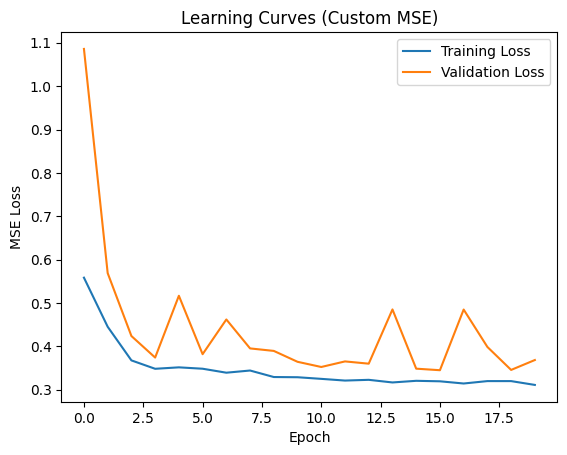

In [7]:
# Plotting Learning Curves
plt.plot(history_simple.history["loss"], label="Training Loss")
plt.plot(history_simple.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Learning Curves (Custom MSE)")
plt.show()

In [8]:
# Evaluating Simple Model
test_loss, test_mse = simple_model.evaluate(X_test_scaled, y_test)
print("Test MSE:", test_mse)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3117 - mse: 0.3117
Test MSE: 0.3245471119880676


In [10]:
# Building the Custom Dense Layer - Mydense
class MyDense(layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name="kernel",
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True
        )
        self.bias = self.add_weight(
            name="bias",
            shape=(self.units,),
            initializer="zeros",
            trainable=True
        )

    def call(self, inputs):
        z = tf.matmul(inputs, self.kernel) + self.bias
        if self.activation:
            return self.activation(z)
        return z

In [11]:
# Training Model Using Mydense Layer
custom_layer_model = keras.Sequential([
    MyDense(30, activation="relu"),
    MyDense(1)
])

custom_layer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=my_mse,
    metrics=["mse"]
)

history_custom_layer = custom_layer_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2013 - mse: 1.2013 - val_loss: 0.7352 - val_mse: 0.7352
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4478 - mse: 0.4478 - val_loss: 0.6801 - val_mse: 0.6801
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3702 - mse: 0.3702 - val_loss: 2.3054 - val_mse: 2.3054
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5932 - mse: 0.5932 - val_loss: 0.3746 - val_mse: 0.3746
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3492 - mse: 0.3492 - val_loss: 0.3603 - val_mse: 0.3603
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3358 - mse: 0.3358 - val_loss: 0.4830 - val_mse: 0.4830
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3536 - mse: 0.3536 - val_loss: 0.4498 - val_mse: 0.4498
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3399 - mse: 0.3399 - val_loss: 0.3594 - val_mse: 0.3594
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

In [12]:
# Evaluating Custom Layer Model
test_loss, test_mse = custom_layer_model.evaluate(X_test_scaled, y_test)
print("Test MSE (Custom Dense):", test_mse)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3055 - mse: 0.3055
Test MSE (Custom Dense): 0.31425055861473083


In [13]:
# Building Custom Model Class -Mymodel
class MyModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_layer = MyDense(1)

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.hidden2(x)
        return self.output_layer(x)

In [14]:
# Training Custom Model
my_model = MyModel()

my_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=my_mse,
    metrics=["mse"]
)

history_model = my_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8647 - mse: 0.8647 - val_loss: 0.4199 - val_mse: 0.4199
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3650 - mse: 0.3650 - val_loss: 0.3703 - val_mse: 0.3703
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3749 - mse: 0.3749 - val_loss: 0.8508 - val_mse: 0.8508
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.4126 - val_mse: 0.4126
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3446 - mse: 0.3446 - val_loss: 0.4898 - val_mse: 0.4898
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3232 - mse: 0.3232 - val_loss: 0.3528 - val_mse: 0.3528
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2840 - mse: 0.2840 - val_loss: 0.3399 - val_mse: 0.3399
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 - mse: 0.3102 - val_loss: 0.3298 - val_mse: 0.3298
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [15]:
# Evaluating the Custom Model
test_loss, test_mse = my_model.evaluate(X_test_scaled, y_test)
print("Final Test MSE (Custom Model):", test_mse)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2913 - mse: 0.2913
Final Test MSE (Custom Model): 0.293851763010025


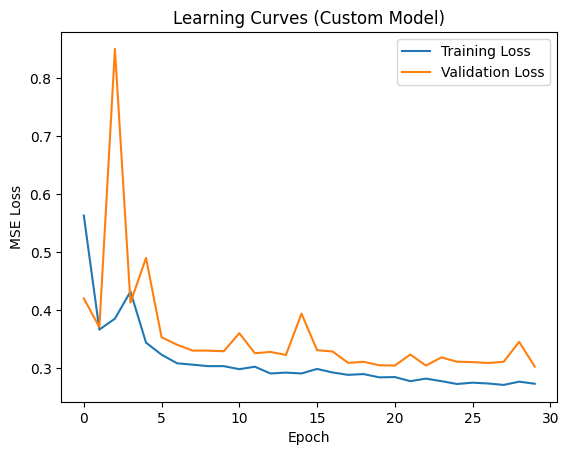

In [16]:
# Plotting the Final Learning Curves
plt.plot(history_model.history["loss"], label="Training Loss")
plt.plot(history_model.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Learning Curves (Custom Model)")
plt.show()